<a href="https://colab.research.google.com/github/Talhadeveloperr/political_bias_detection/blob/main/political_bias_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df_labeled_news = pd.read_csv('/content/labeled_news_data.csv', nrows=5)



print("\nLabeled News Data:")
display(df_labeled_news)


Labeled News Data:


,Story Heading,Story Excerpt,Section,Date,Source,Sentiment,Bias_Score,Bias_Label
0,chinese national held beating traffic police c...,suspect assaulted constable prevented former p...,Pakistan,2020-01-01,all,-0.6705,83.898305,Biased
1,stock lose 152 point directionless trade,kse100 index close 15255 point 037 per cent 40...,Newspaper,2020-01-01,all,0.0000,50.075666,Neutral
2,psx return positive territory,pakistani stock managed eke positive return 10...,Newspaper,2020-01-01,all,0.5574,78.193099,Biased
3,lack lea support hamper effort prevent sale fa...,perpetrator often remain unpunished due busine...,Pakistan,2020-01-01,all,-0.4939,74.989911,Biased
4,sindh chief minister raise burning issue lette...,express concern halt fund critical health proj...,Pakistan,2020-01-01,all,-0.5106,75.832324,Biased


In [3]:
!pip install transformers
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
import nltk

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')   # 🔥 this fixes your error


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
import pandas as pd
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load dataset
df = pd.read_csv("labeled_news_data.csv")   # adjust filename if needed

# Combine headline + excerpt (if both exist)
df["text"] = df["Story Heading"].astype(str) + " " + df["Story Excerpt"].astype(str)

# Initialize tools
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Function to clean text
def preprocess_text(text):
    text = text.lower()                               # lowercase
    text = re.sub(r"[^a-zA-Z\s]", "", text)           # remove punctuation/numbers
    tokens = nltk.word_tokenize(text)                 # tokenize
    tokens = [t for t in tokens if t not in stop_words]  # remove stopwords
    tokens = [lemmatizer.lemmatize(t) for t in tokens]   # lemmatize
    return " ".join(tokens)

# Apply preprocessing
df["clean_text"] = df["text"].apply(preprocess_text)

# TF-IDF conversion
tfidf = TfidfVectorizer(max_features=5000)  # top 5000 features
X_tfidf = tfidf.fit_transform(df["clean_text"])
y = df["Bias_Label"]   # target

print("TF-IDF shape:", X_tfidf.shape)
print("Sample features:", tfidf.get_feature_names_out()[:20])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


TF-IDF shape: (48702, 5000)
Sample features: ['aamer' 'aamir' 'abbas' 'abbasi' 'abbottabad' 'abducted' 'abduction'
 'abdul' 'abdulaziz' 'abdullah' 'abid' 'ability' 'able' 'abroad' 'absence'
 'abu' 'abuse' 'ac' 'academia' 'academic']


In [8]:
from transformers import BertTokenizer, BertModel
import torch

# Load BERT tokenizer & model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

def get_bert_embeddings(texts, tokenizer, model):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    # CLS token representation (sentence embedding)
    embeddings = outputs.last_hidden_state[:,0,:]
    return embeddings

# Example: generate embeddings for first 5 samples
sample_texts = df["clean_text"].head(5).tolist()
bert_embeddings = get_bert_embeddings(sample_texts, tokenizer, bert_model)

print("BERT embedding shape:", bert_embeddings.shape)  # (num_samples, 768)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERT embedding shape: torch.Size([5, 768])


In [9]:
POLITICAL_KEYWORDS = [
    "pmln", "pti", "ppp", "mqm", "jui-f", "ji", "anp", "bnp", "tlp", "aml",
    "nawaz", "imran", "bhutto", "benazir", "zardari", "bilawal", "shahbaz", "maryam",
    "sc", "supreme court", "parliament", "senate", "army", "nab", "fbr", "ecp",
    "cpec", "loc", "election", "government", "opposition", "prime minister", "president",
    "ministry", "political", "party", "vote", "democracy", "coalition"
]

# keep only rows with political terms
pattern = "|".join(POLITICAL_KEYWORDS)
df_political = df[df["clean_text"].str.contains(pattern, case=False, na=False)]

print("Original dataset:", len(df))
print("Filtered political dataset:", len(df_political))


Original dataset: 48702
Filtered political dataset: 33619


In [10]:
from sklearn.model_selection import train_test_split

X = df_political["clean_text"]
y = df_political["Bias_Label"]

# Train / Temp split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Validation / Test split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))


Train size: 23533
Validation size: 5043
Test size: 5043


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # use unigrams + bigrams
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf   = tfidf.transform(X_val)
X_test_tfidf  = tfidf.transform(X_test)

print("TF-IDF Shape:", X_train_tfidf.shape)


TF-IDF Shape: (23533, 5000)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Logistic Regression
lr = LogisticRegression(max_iter=200, class_weight="balanced")
lr.fit(X_train_tfidf, y_train)

y_val_pred = lr.predict(X_val_tfidf)
print("Logistic Regression Report:")
print(classification_report(y_val, y_val_pred))

# Random Forest
rf = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
rf.fit(X_train_tfidf, y_train)

y_val_pred_rf = rf.predict(X_val_tfidf)
print("Random Forest Report:")
print(classification_report(y_val, y_val_pred_rf))


Logistic Regression Report:
              precision    recall  f1-score   support

      Biased       0.95      0.80      0.87      4373
     Neutral       0.36      0.72      0.48       670

    accuracy                           0.79      5043
   macro avg       0.65      0.76      0.67      5043
weighted avg       0.87      0.79      0.82      5043

Random Forest Report:
              precision    recall  f1-score   support

      Biased       0.89      0.98      0.94      4373
     Neutral       0.68      0.21      0.32       670

    accuracy                           0.88      5043
   macro avg       0.78      0.60      0.63      5043
weighted avg       0.86      0.88      0.85      5043



In [13]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from sklearn.preprocessing import LabelEncoder

# Encode labels (Biased / Neutral)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc   = le.transform(y_val)
y_test_enc  = le.transform(y_test)

# Tokenize
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq   = tokenizer.texts_to_sequences(X_val)
X_test_seq  = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post")
X_val_pad   = pad_sequences(X_val_seq, maxlen=max_len, padding="post")
X_test_pad  = pad_sequences(X_test_seq, maxlen=max_len, padding="post")

# Build BiLSTM model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train_pad, y_train_enc,
                    validation_data=(X_val_pad, y_val_enc),
                    epochs=5, batch_size=64)

# Evaluate
loss, acc = model.evaluate(X_test_pad, y_test_enc)
print(f"BiLSTM Test Accuracy: {acc:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
368/368 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.8696 - loss: 0.3657 - val_accuracy: 0.9024 - val_loss: 0.2514
Epoch 2/5
368/368 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9455 - loss: 0.1759 - val_accuracy: 0.9205 - val_loss: 0.2340
Epoch 3/5
368/368 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9717 - loss: 0.1063 - val_accuracy: 0.9195 - val_loss: 0.2682
Epoch 4/5
368/368 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9819 - loss: 0.0734 - val_accuracy: 0.9223 - val_loss: 0.2874
Epoch 5/5
368/368 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9869 - loss: 0.0488 - val_accuracy: 0.9203 - val_loss: 0.3965
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9239 - loss: 0.3438
BiLSTM Test Accuracy: 0.9223


In [15]:
from torch.optim import AdamW


In [16]:
!pip install transformers datasets

import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW   # ✅ FIXED
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc   = le.transform(y_val)
y_test_enc  = le.transform(y_test)

# Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts.tolist()
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        inputs = self.tokenizer(
            text,
            return_tensors="pt",
            max_length=self.max_len,
            padding="max_length",
            truncation=True
        )
        item = {key: val.squeeze(0) for key, val in inputs.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

# Datasets
train_dataset = NewsDataset(X_train, y_train_enc, tokenizer)
val_dataset   = NewsDataset(X_val, y_val_enc, tokenizer)
test_dataset  = NewsDataset(X_test, y_test_enc, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16)

# Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model = model.to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training Loop
for epoch in range(2):  # try 2–3 epochs for start
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        batch = {k: v.to(device) for k,v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} Loss: {total_loss/len(train_loader):.4f}")

# Validation
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for batch in val_loader:
        batch = {k: v.to(device) for k,v in batch.items()}
        outputs = model(**batch)
        preds = torch.argmax(outputs.logits, dim=1)
        correct += (preds == batch["labels"]).sum().item()
        total += batch["labels"].size(0)

print(f"Validation Accuracy: {correct/total:.4f}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 1471/1471 [08:21<00:00,  2.93it/s]


Epoch 1 Loss: 0.2723


100%|██████████| 1471/1471 [08:19<00:00,  2.95it/s]


Epoch 2 Loss: 0.1597
Validation Accuracy: 0.9439


In [18]:
test_loader = DataLoader(test_dataset, batch_size=16)


📊 Evaluation Metrics:
Accuracy  : 0.9488
Precision : 0.9469
Recall    : 0.9488
F1-Score  : 0.9471

Classification Report:
              precision    recall  f1-score   support

      Biased       0.96      0.98      0.97      4373
     Neutral       0.86      0.73      0.79       670

    accuracy                           0.95      5043
   macro avg       0.91      0.86      0.88      5043
weighted avg       0.95      0.95      0.95      5043



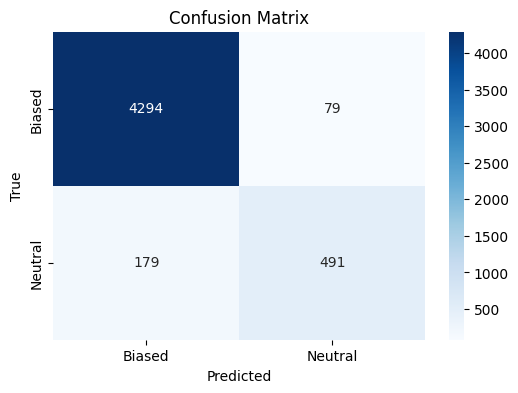

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate on Test Set
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k,v in batch.items()}
        outputs = model(**batch)
        preds = torch.argmax(outputs.logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch["labels"].cpu().numpy())

# Metrics
acc  = accuracy_score(all_labels, all_preds)
prec = precision_score(all_labels, all_preds, average="weighted")
rec  = recall_score(all_labels, all_preds, average="weighted")
f1   = f1_score(all_labels, all_preds, average="weighted")

print("📊 Evaluation Metrics:")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-Score  : {f1:.4f}\n")

print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [20]:
import torch
import pickle

# 1. Save model state
torch.save(model.state_dict(), "bert_bias_model.pt")

# 2. Save tokenizer
tokenizer.save_pretrained("./tokenizer")

# 3. Optionally, save label encoder (needed for decoding predictions)
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("✅ Model, tokenizer, and label encoder saved!")


✅ Model, tokenizer, and label encoder saved!


In [23]:
from google.colab import files

files.download("bert_bias_model.pt")
files.download("label_encoder.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>